In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,20)


In [8]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')

In [12]:
df1.head(10)

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   
5  Super built-up  Area  Ready To Move                Whitefield      2 BHK   
6  Super built-up  Area         18-May          Old Airport Road      4 BHK   
7  Super built-up  Area  Ready To Move              Rajaji Nagar      4 BHK   
8  Super built-up  Area  Ready To Move              Marathahalli      3 BHK   
9            Plot  Area  Ready To Move              Gandhi Bazar  6 Bedroom   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
5  DuenaTa       1170   2.0      1.0   38.00  
6  Jaades        2732   4.0      NaN  204.00  
7  Brway G       3300   4.0      NaN  600.00  
8      NaN       1310   3.0      1.0   63.25  
9      NaN       1020   6.0      NaN  370.00

In [14]:
df1.shape  //rows * columns

(13320, 9)

In [16]:
df1["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [19]:
 df2 = df1.drop(['area_type','availability','society','balcony'], axis = 'columns')
df2.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [21]:
df2.shape

(13320, 5)

In [22]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [24]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [28]:
df3['size'].unique() //all the unique values in a column

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [31]:
df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-31-402cbe9b91bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [42]:
#Create a column by applying (.apply)function on existing column. Now we take x values as all the strings and then
#split these strings to get the first string.After that we simply convert it into an integer.

In [32]:
df3.head() #now we dont have any unique stuff and BHK is now a no.

location       size total_sqft  bath   price  BHK
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [33]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [34]:
df3[df3.BHK>20] //filtering according to choice.

location        size total_sqft  bath  price  BHK
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0   43

In [35]:
df3.total_sqft.unique() #we have some problems here so i am creating a function to see if the below 
                        #values to check they're float or not and seperate them.

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [36]:
def is_float(x):
    try:
        float(x) #function will try to convert X into float. if the value is not able to convert then it will return false
                 #this will remove any discrepencies from the column.
    except:
        return False
    return True
        
     

In [40]:
df3[~df3['total_sqft'].apply(is_float)] 

location   size   total_sqft  bath    price  BHK
30              Yelahanka  4 BHK  2100 - 2850   4.0  186.000    4
122                Hebbal  4 BHK  3067 - 8156   4.0  477.000    4
137    8th Phase JP Nagar  2 BHK  1042 - 1105   2.0   54.005    2
165              Sarjapur  2 BHK  1145 - 1340   2.0   43.490    2
188              KR Puram  2 BHK  1015 - 1540   2.0   56.800    2
...                   ...    ...          ...   ...      ...  ...
12975          Whitefield  2 BHK   850 - 1060   2.0   38.190    2
12990      Talaghattapura  3 BHK  1804 - 2273   3.0  122.000    3
13059              Harlur  2 BHK  1200 - 1470   2.0   72.760    2
13265               Hoodi  2 BHK  1133 - 1384   2.0   59.135    2
13299          Whitefield  4 BHK  2830 - 2882   5.0  154.500    4

[190 rows x 6 columns]

In [ ]:
# ~ is a negate option where we get all the alternate values. Here we'll get all the 'false' or non float values

In [ ]:
#now we'll create a function which will get all the range values and return their average.

In [49]:
def avg_sqft(x):
    token = x.split('-')     #splits the string from '-'
    if len(token)== 2:       #since there are two strings
        return (float(token[0])+float(token[1]))/2     #it'll break it down and take avg. of them both.  
    try:
        return float(x)     #else it'll return the same float if there are no two nums there.
    except:
        return None

In [50]:
avg_sqft('2020 - 2021')

2020.5

In [51]:
df4 = df3.copy()
df4['total_sqft']= df4['total_sqft'].apply(avg_sqft)
df4.head()

location       size  total_sqft  bath   price  BHK
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

In [52]:
df4.loc[30] #to check the part where there was problem of avg.

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
BHK                   4
Name: 30, dtype: object

In [54]:
df5 = df4.copy()
df4.head()

location       size  total_sqft  bath   price  BHK
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

In [58]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']   #multiply 1 lac as price was in lacs
df5.head()

location       size  total_sqft  bath   price  BHK  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [64]:
len(df5.location.unique()) #len is used to find the no. of resultant values

1304

In [71]:
df5.location = df5.location.apply(lambda x: x.strip())  #this strips any space between the alphabets
                                                        #of the loaction words
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False) #gives descending
location_stats    #groupby function is used to split the data into groups based on some criteria. if we apply groupby
                  #on any category we will get all the data relative to the category we applied groupdata on.

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [73]:
len(location_stats[location_stats<=2]) #the locations which have less than 2 data points.

646

In [93]:
location_less_than_10 = location_stats[location_stats<10] #making new variable and printing
location_less_than_10

location
Chandra Layout        9
Jakkur Plantation     9
2nd Phase JP Nagar    9
Yemlur                9
Mathikere             9
                     ..
LIC Colony            1
Kuvempu Layout        1
Kumbhena Agrahara     1
Kudlu Village,        1
1 Annasandrapalya     1
Name: location, Length: 1039, dtype: int64

In [94]:
len(df5.location.unique())

822

In [95]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_less_than_10 else x) #whatever be the X value
                                                                # if less than 2 then the dataframe will look 'other'
len(df5.location.unique())

255

In [96]:
df5.head(10)

location       size  total_sqft  bath   price  BHK  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                Whitefield      2 BHK      1170.0   2.0   38.00    2   
6          Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8              Marathahalli      3 BHK      1310.0   3.0   63.25    3   
9                     other  6 Bedroom      1020.0   6.0  370.00    6   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000  
5     3247.863248  
6     7467.057101  
7    18181.818182  
8     4828.244275  
9    36274.509804

In [97]:
df5.drop(['size'], axis = 'columns')

location  total_sqft  bath   price  BHK  price_per_sqft
0      Electronic City Phase II      1056.0   2.0   39.07    2     3699.810606
1              Chikka Tirupathi      2600.0   5.0  120.00    4     4615.384615
2                   Uttarahalli      1440.0   2.0   62.00    3     4305.555556
3            Lingadheeranahalli      1521.0   3.0   95.00    3     6245.890861
4                      Kothanur      1200.0   2.0   51.00    2     4250.000000
...                         ...         ...   ...     ...  ...             ...
13315                Whitefield      3453.0   4.0  231.00    5     6689.834926
13316                     other      3600.0   5.0  400.00    4    11111.111111
13317     Raja Rajeshwari Nagar      1141.0   2.0   60.00    2     5258.545136
13318           Padmanabhanagar      4689.0   4.0  488.00    4    10407.336319
13319              Doddathoguru       550.0   1.0   17.00    1     3090.909091

[13246 rows x 6 columns]

In [98]:
#OUTLIER REMOVAL

In [99]:
df5[df5.total_sqft/df5.BHK<300].head()

location       size  total_sqft  bath  price  BHK  \
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70                other  3 Bedroom       500.0   3.0  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

In [103]:
df6 = df5[~(df5.total_sqft/df5.BHK<300)] # ~( ) this is used to negate or remove these outliers or data
df6.shape # gives rows and columns

(12502, 7)

In [ ]:
# since 1 bed shall atleast have 300 sqft so we removed those outliers.

In [104]:
df6.price_per_sqft.describe()  #this gives the statistics of the column

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [107]:
# we'll now write a function to remove any extreme values according to standard deviation. since most of the data
# usually revolves around mean and 1 standard deviation. we'll remove the ones out of this range.
# Now here since per location the prices are different. We'll see mean prices per loaction and delete outliers in each
# location.

In [108]:
def remove_outliers(df): #taking data frame as input
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'): #grouping by location first. per location we get subdf (sub dataframe)
        m = np.mean(subdf.price_per_sqft) # m is Mean
        st = np.std(subdf.price_per_sqft) # st is Standard Deviaton
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= m+st)] #filtering
        df_out = pd.concat([df_out,reduced_df],ignore_index = True) # this will append the result dataframes 
                                                                    # per location.
    return df_out
         
    # standard deviation shows distribution relative to mean.

In [111]:
df7 = remove_outliers(df6) # after removing price per sqft outliers.
df7.shape #removed like 2k outliers

(10222, 7)

Also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34        <-- we will create dictionaries like these. and we will filter out all 2 BHK homes less                                    than the 1 BHK mean. likewise for every BHK.
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

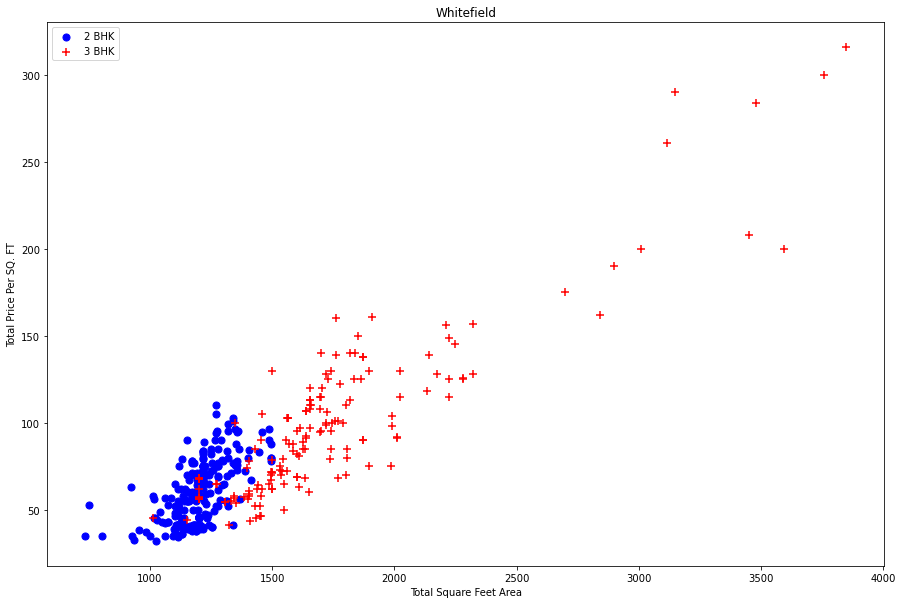

In [124]:
def plot_scatter_chart(df,location): # will take dataframe and it's location as parameter
    bhk2 = df[(df.location==location) & (df.BHK==2)] # creates a dataframe. will plot 2 and 3 bedroom
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50) #scatter Plot
    plt.scatter(bhk3.total_sqft,bhk3.price, marker = '+', color='red',label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Total Price Per SQ. FT')
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,'Whitefield')
    


In [118]:
# Now we'll remove outliers like 3BHK costing less than 2BHK for same Total Square Feet for every location.
# so now we'll output price_per_sqft mean of each location and see if more BHK costs less than less BHK and remove them

In [129]:
def remove_bhk_outliers (df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'): # going through every location dataframe
        BHK_stats={}
        for BHK, BHK_df in location_df.groupby('BHK'): # for every location dataframe it will loop through all BHk 
                                                      #  dataframes.
            BHK_stats[BHK] = {
                'mean': np.mean(BHK_df.price_per_sqft), #per BHk data frame it will calculate mean,std and count
                'std' : np.std(BHK_df.price_per_sqft),
                'count': BHK_df.shape[0]
            }
        for BHK, BHK_df in location_df.groupby('BHK'): # now again in the same for loop the BHK outliers will be
                                                      # removed accordingly. BHk comparison of price of previous BHK.  
                                                    # eg. all BHK 3 prices will be checked with BHK 2 
            stats = BHK_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
                
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7369, 7)


____________________________________________________EXPLANATION_______________________________________________________
Inner for loop will iterate for every possible group of no. of bedrooms of that respective  location group. (of outer for loop)


First inner for loop will store information about mean , std and no of data points( no of values present in a group of bedroom) in the already created dictionary in the outer for loop with key as the respective bedroom no. group. i.e (bhk_stats[2] stores info about 2 bedroom group values)

Second inner for loop performs the main functionality,
stats = bhk_stats.get(bhk-1)


here it will fetch the value for the previous no. of bedroom group.
For example, for 1 bedroom group it will be None , as there is no possibe value stored for 0 bedroom group, simply because there is not any value like that in dataframe.


also for 3 bedroom group, it will fetch information about 2 bedroom group ( so that we can check the mean value )

"stats and stats[count]>5" in the BHK outlier removal.
Considering only cases where number of apartments (for given bhk) is greater than 5. Because less than that would be very few samples to run any logic. 5 is a randomly taken number, you can change it something else that is reasonable enough.

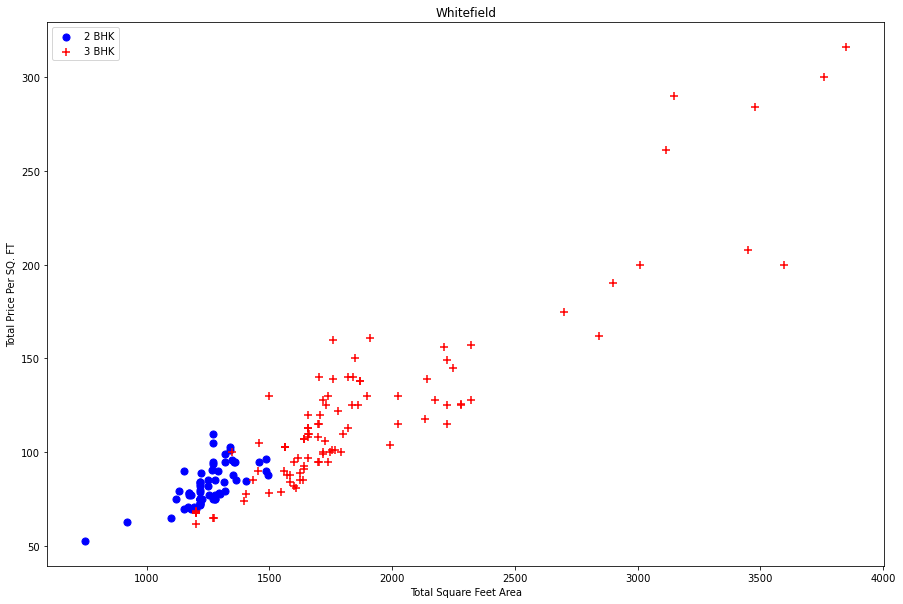

In [131]:
def plot_scatter_chart(df,location): # will take dataframe and it's location as parameter
    bhk2 = df[(df.location==location) & (df.BHK==2)] # creates a dataframe. will plot 2 and 3 bedroom
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50) #scatter Plot
    plt.scatter(bhk3.total_sqft,bhk3.price, marker = '+', color='red',label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Total Price Per SQ. FT')
    plt.title(location)
    plt.legend()

plot_scatter_chart(df8,'Whitefield')

Text(0, 0.5, 'Count')

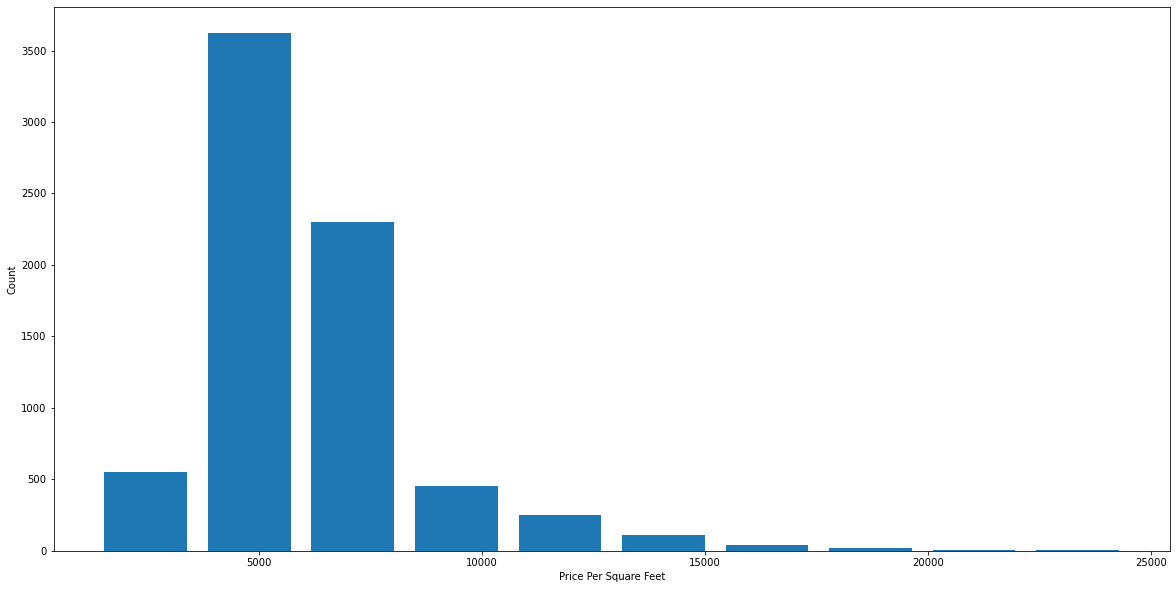

In [132]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [133]:
df8.bath.unique() # wow 13 bathroms lets see..

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [134]:
 df8[df8.bath>10]  # Now see if no. of bathrooms greater than bedroom + 2

location       size  total_sqft  bath  price  BHK  price_per_sqft
585    BTM 1st Stage  9 Bedroom      3300.0  14.0  500.0    9    15151.515152
5344  Neeladri Nagar     10 BHK      4000.0  12.0  160.0   10     4000.000000
8547           other     10 BHK     12000.0  12.0  525.0   10     4375.000000
8633           other     16 BHK     10000.0  16.0  550.0   16     5500.000000
9329           other     11 BHK      6000.0  12.0  150.0   11     2500.000000
9642           other     13 BHK      5425.0  13.0  275.0   13     5069.124424

Text(0, 0.5, 'Count')

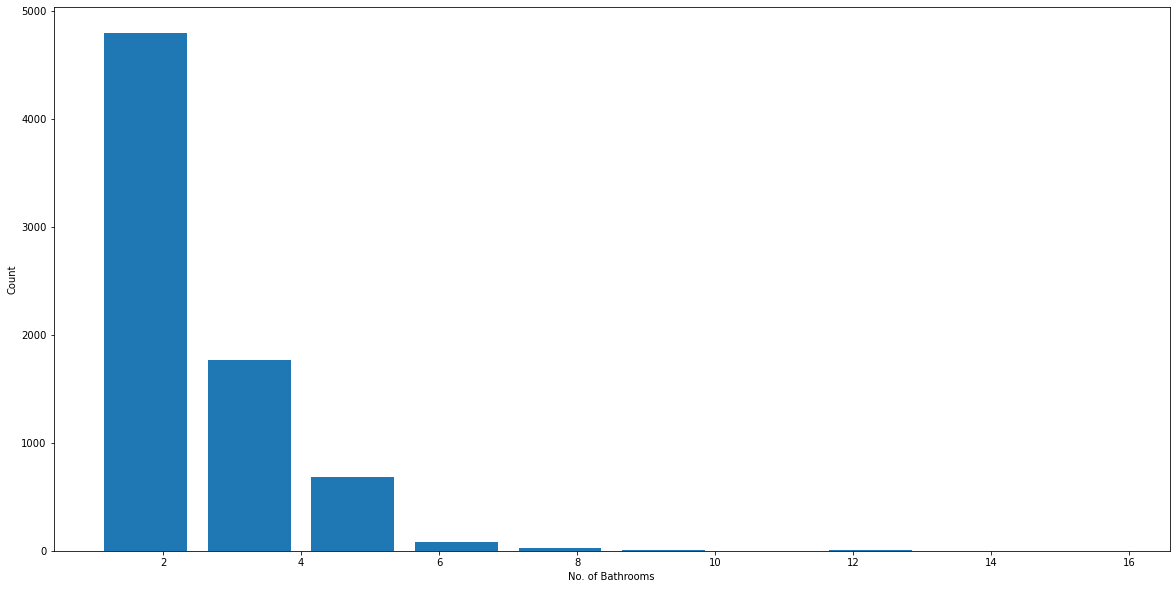

In [136]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("No. of Bathrooms") # most properties have 2 bathrooms
plt.ylabel("Count")

In [139]:
#if no. of bathrooms greater than bedroom + 2 they'll be outliers.

In [140]:
df8[df8.bath>df8.BHK+2]

location       size  total_sqft  bath   price  BHK  price_per_sqft
585   BTM 1st Stage  9 Bedroom      3300.0  14.0   500.0    9    15151.515152
1642  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0    4     3252.032520
5305     Nagasandra  4 Bedroom      7000.0   8.0   450.0    4     6428.571429
6792    Thanisandra      3 BHK      1806.0   6.0   116.0    3     6423.034330
8476          other      6 BHK     11338.0   9.0  1000.0    6     8819.897689

In [141]:
df9 = df8[df8.bath<df8.BHK+2] # so we filtered out the outliers
df9.shape

(7291, 7)

In [146]:
df10 = df9.drop(['size','price_per_sqft'], axis = 'columns')
df10.head()

location  total_sqft  bath  price  BHK
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3
3  1st Block Jayanagar      1200.0   2.0  130.0    3
4  1st Block Jayanagar      1235.0   2.0  148.0    2

In [147]:
# Now this text{categorical} cannot be processed by ML algo so we use One Hot Encoder for converting it to numerical.

In [ ]:
# aka pandas dummies.

In [151]:
dummies = pd.get_dummies(df10.location) #this will create dummies on the column put.

In [152]:
dummies.head()

1st Block Jayanagar  1st Block Koramangala  1st Phase JP Nagar  \
0                    1                      0                   0   
1                    1                      0                   0   
2                    1                      0                   0   
3                    1                      0                   0   
4                    1                      0                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   5th Phase JP Nagar  6th Phase JP Nagar  7th Phase JP Nagar  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   8th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                   0  ...                     0                   0   
1                   0  ...                     0                   0   
2                   0  ...                     0                   0   
3                   0  ...                     0                   0   
4                   0  ...                     0                   0   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0            0           0               0          0                   0   
1            0           0               0          0                   0   
2            0           0               0          0                   0   
3            0           0               0          0                   0   
4            0           0               0          0                   0   

   Yelenahalli  Yeshwanthpur  other  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0  

[5 rows x 255 columns]

In [155]:
df11 = pd.concat([df10 , dummies.drop('other', axis = 'columns')], axis='columns') 
# append the dummy to main data frame df10 with columns.

In [156]:
df11.head()  #we can drop one column as it will be 0 in every other column. we can continue without one.

location  total_sqft  bath  price  BHK  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                    1   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                    1   
2  1st Block Jayanagar      1875.0   2.0  235.0    3                    1   
3  1st Block Jayanagar      1200.0   2.0  130.0    3                    1   
4  1st Block Jayanagar      1235.0   2.0  148.0    2                    1   

   1st Block Koramangala  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                      0                   0                          0   
1                      0                   0                          0   
2                      0                   0                          0   
3                      0                   0                          0   
4                      0                   0                          0   

   2nd Stage Nagarbhavi  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 259 columns]

In [163]:
df12 = df11.drop('location', axis = 'columns')
df12.head()

total_sqft  bath  price  BHK  1st Block Jayanagar  1st Block Koramangala  \
0      2850.0   4.0  428.0    4                    1                      0   
1      1630.0   3.0  194.0    3                    1                      0   
2      1875.0   2.0  235.0    3                    1                      0   
3      1200.0   2.0  130.0    3                    1                      0   
4      1235.0   2.0  148.0    2                    1                      0   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 258 columns]

In [164]:
df12.shape # Now we start with machine learning.

(7291, 258)

In [175]:
X = df12.drop('price',axis = 'columns')  # creating x variable which would contain independent columns (variables) only.

In [176]:
Y = df12.price  # Y is only dependent variable
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [177]:
len(Y)

7291

In [180]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)  # here we follow fit method to x train and y train.
lr_clf.score(X_test,y_test)  # now it will tell the score of model.

0.8556662450161905

In [181]:
# now we'll evaluate our again with K fold method to increase accuracy.

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score   # splits are 5 so there are 5 folds

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) # this will randomise my sample so that each fold has
                                                             #  equal distribution.

cross_val_score(LinearRegression(), X, y, cv=cv)       


array([0.84196276, 0.82904236, 0.90136194, 0.85131228, 0.84354632])

This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose. 

Find best model using GridSearchCV as GridSearchCV provides the best possible solutions in all types of ML models and provides us score from all the models. It's an sklearn model and provides the best regressors and parameters

In [182]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):   #function to find my best model where (x,y) are input
    algos = {    
        'linear_regression' : {      #now it will provide the best model amonst these models and provide the best 
                                     # parameters as well.
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]   # this is hyper parameter tuning.
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) # this will shuffle the sample.
    for algo_name, config in algos.items(): # this will go thru dictionary of models written above.
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y) # fit method call and the scores will append to list.
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

model  best_score                               best_params
0  linear_regression    0.853445                      {'normalize': False}
1              lasso    0.703397       {'alpha': 1, 'selection': 'random'}
2      decision_tree    0.692991  {'criterion': 'mse', 'splitter': 'best'}

In [183]:
# Now that we have found the best model. lets test it on a few samples.

In [188]:
X.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=257)

In [193]:
np.where(X.columns=='Whitefield')[0][0]  #we get that the 251th column is whitefield.

251

In [196]:
def predict_price(location,sqft,bath,bhk):# <-- it will take these inputs    #predict price function
    loc_index = np.where(X.columns==location)[0][0] #here we will get the index value of location.

    x = np.zeros(len(X.columns))
    x[0] = sqft # now in x column array the 1st column is sqft
    x[1] = bath # 2nd is bath
    x[2] = bhk # etc. etc.
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [197]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

86.10543612135704

In [199]:
predict_price('Whitefield',1000, 2, 2)


52.24351557606887

In [212]:
import pickle

with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)  # here we passed the linear regression classifier model
f


<_io.BufferedWriter name='banglore_home_prices_model.pickle'>

In [213]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns] #convert to lower case
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))      #all the above structured columns wiil be exported to json.